On considère une image $(x_{i,j})_{i=0\ldots N-1,j=0\ldots M-1}$ comme un vecteur de $\mathbb{R}^{NM}$.

Dans l'espace des dérivées $\mathbb{R} \times \mathbb{R}^{(N-1)M} \times \mathbb{R}^{N(M-1)}$, le point correspondant est :
 $$ Ax = \begin{pmatrix} 
\sum_{i,j} x_{i,j} \\
(x_{i+1,j} - x_{i,j})\\
(x_{i,j+1} - x_{i,j})\\
\end{pmatrix}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# k = M*i+j
N = 30
M = 30


dim_img = N*M
dim_der = 1 + (N-1)*M + N*(M-1)

A = np.zeros((dim_der,dim_img))

In [3]:
for i in range(N):
    for j in range(M):
        k = M*i+j
        A[0,k] = 1
        
for i in range(N-1):
    for j in range(M):
        k = M*i+j
        l = 1 + M*i+j
        A[l,k+M] = 1
        A[l,k] = -1
        
for i in range(N):
    for j in range(M-1):
        k = M*i+j
        l = 1+M*(N-1)+(M-1)*i+j
        A[l,k+1] = 1
        A[l,k] = -1

In [4]:
print(A)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [-1.  0.  0. ...,  0.  0.  0.]
 [ 0. -1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ..., -1.  1.  0.]
 [ 0.  0.  0. ...,  0. -1.  1.]]


In [5]:
A_t = np.transpose(A)
A_plus = np.linalg.inv(A_t.dot(A)).dot(A_t)

In [8]:
print(A_plus)

[[ 0.00111111 -0.49944444 -0.1970981  ..., -0.00164814 -0.00110648
  -0.00055556]
 [ 0.00111111 -0.1970981  -0.39475176 ..., -0.00163425 -0.00109722
  -0.00055092]
 [ 0.00111111 -0.09240542 -0.15503652 ..., -0.00160647 -0.0010787
  -0.00054166]
 ..., 
 [ 0.00111111  0.00056945  0.00057408 ...,  0.37399365 -0.24966416
  -0.09351653]
 [ 0.00111111  0.00056019  0.00056482 ...,  0.24978029  0.40592792
  -0.19820921]
 [ 0.00111111  0.00055556  0.00056019 ...,  0.20771871  0.30123523
   0.49944444]]


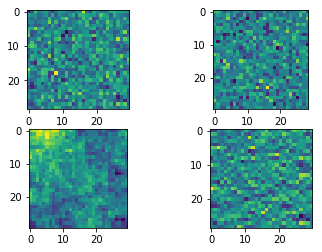

In [28]:
y = np.random.randn(dim_der)

def plot_projection_from(y):
    x = A_plus.dot(y)
    y1 = np.reshape(y[1:(N-1)*M+1],(N-1,M))
    y2 = np.reshape(y[(N-1)*M+1:],(N,M-1))
    plt.subplot(2,2,1)
    plt.imshow(y1)
    plt.subplot(2,2,2)
    plt.imshow(y2)
    x_reshaped = np.reshape(x,(N,M))
    plt.subplot(2,2,3)
    plt.imshow(x_reshaped)
    y_ = A.dot(x)
    y_1 = np.reshape(y_[1:(N-1)*M+1],(N-1,M))
    y_2 = np.reshape(y_[(N-1)*M+1:],(N,M-1))
    plt.subplot(2,2,4)
    plt.imshow(y_1)
    #print(y_1)
    #print(y_2)
    plt.show()

plot_projection_from(y)

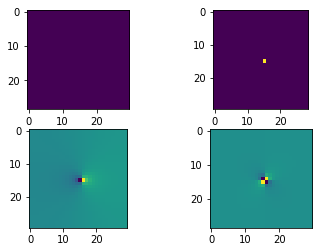

In [21]:
y = np.zeros(dim_der)
i = N//2
j = M//2
k = 1+M*(N-1)+(M-1)*i+j
y[k] = 1
plot_projection_from(y)

### Periodic boundary conditions

In [35]:
dim_img = N*M
dim_der = 1 + N*M + N*M

B = np.zeros((dim_der,dim_img))

In [36]:
for i in range(N):
    for j in range(M):
        k = M*i+j
        B[0,k] = 1
        
for i in range(N):
    for j in range(M):
        k = M*i+j
        k_ = M*((i+1)%N)+j
        l = 1 + M*i+j
        B[l,k_] = 1
        B[l,k] = -1
        
for i in range(N):
    for j in range(M):
        k = M*i+j
        k_ = M*i+(j+1)%M
        l = 1+M*N+M*i+j
        B[l,k_] = 1
        B[l,k] = -1

In [37]:
B_t = np.transpose(B)
B_plus = np.linalg.inv(B_t.dot(B)).dot(B_t)
print(B_plus)

[[ 0.00111111 -0.24972222 -0.06803304 ...,  0.05236245  0.06747749
   0.06803304]
 [ 0.00111111 -0.06803304 -0.24972222 ...,  0.04005555  0.05236245
   0.06747749]
 [ 0.00111111 -0.02296551 -0.06803304 ...,  0.03130694  0.04005555
   0.05236245]
 ..., 
 [ 0.00111111 -0.02102086 -0.01277652 ..., -0.24972222 -0.11254502
  -0.06550289]
 [ 0.00111111 -0.03696944 -0.02102086 ...,  0.24972222 -0.24972222
  -0.11254502]
 [ 0.00111111 -0.06747749 -0.03696944 ...,  0.11254502  0.24972222
  -0.24972222]]


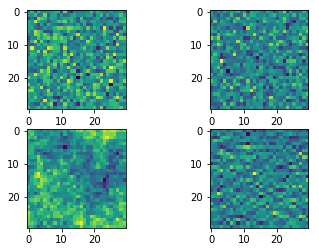

In [45]:
y = np.random.randn(dim_der)

def plot_pbc_projection_from(y):
    x = B_plus.dot(y)
    y1 = np.reshape(y[1:N*M+1],(N,M))
    y2 = np.reshape(y[N*M+1:],(N,M))
    plt.subplot(2,2,1)
    plt.imshow(y1)
    plt.subplot(2,2,2)
    plt.imshow(y2)
    x_reshaped = np.reshape(x,(N,M))
    plt.subplot(2,2,3)
    plt.imshow(x_reshaped)
    y_ = B.dot(x)
    y_1 = np.reshape(y_[1:N*M+1],(N,M))
    y_2 = np.reshape(y_[N*M+1:],(N,M))
    plt.subplot(2,2,4)
    plt.imshow(y_1)
    #print(y_1)
    #print(y_2)
    plt.show()

plot_pbc_projection_from(y)

### Fourier analysis of the result

In [46]:
import numpy.fft as fft

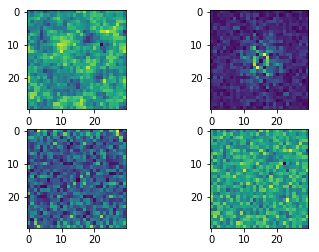

In [113]:
y = np.random.randn(dim_der)
y[0] = 0
x = B_plus.dot(y)
x = x.reshape((N,M))
fx = fft.fft2(x)
plt.subplot(2,2,1)
plt.imshow(x)
plt.subplot(2,2,2)
plt.imshow(fft.fftshift(abs(fx)))


aa,bb = np.meshgrid(np.arange(1,N+1),np.arange(1,M+1))
aa = np.minimum(aa,N+1-aa); bb = np.minimum(bb,M+1-bb)
fx_filt = fx * np.sqrt(aa**2+bb**2+1)
plt.subplot(2,2,3)
plt.imshow(fft.fftshift(abs(fx_)))
x_filt = fft.ifft2(fx_filt)
plt.subplot(2,2,4)
plt.imshow(np.real(x_filt))

plt.show()

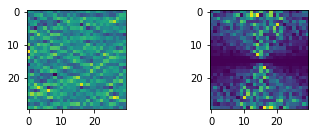

In [116]:
y = np.random.randn(dim_der)
y[0] = 0
y[N*M+1:] = 0
x = B_plus.dot(y)
y_proj = B.dot(x)
y_proj_1 = np.reshape(y_proj[1:1+N*M],(N,M))
fyp1 = fft.fft2(y_proj_1)
plt.subplot(2,2,3)
plt.imshow(y_proj_1)
plt.subplot(2,2,4)
plt.imshow(fft.fftshift(abs(fyp1)))
plt.show()